### Import libraries

In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
import numpy as np
import matplotlib.pyplot as plt

2023-12-27 08:23:27.081288: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-27 08:23:27.083900: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-27 08:23:27.131741: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-27 08:23:27.132853: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-27 08:23:28.231649: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

### Load the data

In [2]:
train_datagen = ImageDataGenerator(rescale=1/255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)

In [3]:
test_datagen=ImageDataGenerator(rescale=1/255)

In [22]:
train=train_datagen.flow_from_directory('dataset/training_set/',class_mode='binary',target_size=(64,64))

Found 13 images belonging to 2 classes.


In [23]:
test= test_datagen.flow_from_directory('dataset/test_set/',class_mode='binary',target_size=(64,64))

Found 6 images belonging to 2 classes.


### Build the model

In [24]:
model=Sequential()

model.add(Conv2D(filters=16,kernel_size=(3,3),input_shape=(64,64,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=8,kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(16,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [25]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 62, 62, 16)        448       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 31, 31, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 29, 29, 8)         1160      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 14, 14, 8)        0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 1568)              0         
                                                                 
 dense_8 (Dense)             (None, 16)               

### Model Compile

In [26]:
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

### Train the model

In [27]:
model.fit(train,epochs=10,validation_data=test, batch_size=1)

Epoch 1/10


2023-12-27 08:34:39.896398: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


1/1 [==============================] - ETA: 0s - loss: 0.7804 - accuracy: 0.5385

2023-12-27 08:34:42.505490: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


1/1 [==============================] - 3s 3s/step - loss: 0.7804 - accuracy: 0.5385 - val_loss: 0.6979 - val_accuracy: 0.5000
Epoch 2/10
1/1 [==============================] - 0s 139ms/step - loss: 0.6793 - accuracy: 0.5385 - val_loss: 0.6905 - val_accuracy: 0.5000
Epoch 3/10
1/1 [==============================] - 0s 140ms/step - loss: 0.6952 - accuracy: 0.4615 - val_loss: 0.6588 - val_accuracy: 0.5000
Epoch 4/10
1/1 [==============================] - 0s 139ms/step - loss: 0.6521 - accuracy: 0.4615 - val_loss: 0.6381 - val_accuracy: 0.8333
Epoch 5/10
1/1 [==============================] - 0s 141ms/step - loss: 0.6121 - accuracy: 0.8462 - val_loss: 0.6240 - val_accuracy: 0.5000
Epoch 6/10
1/1 [==============================] - 0s 143ms/step - loss: 0.6053 - accuracy: 0.7692 - val_loss: 0.5995 - val_accuracy: 0.5000
Epoch 7/10
1/1 [==============================] - 0s 138ms/step - loss: 0.5703 - accuracy: 0.6923 - val_loss: 0.5681 - val_accuracy: 0.6667
Epoch 8/10
1/1 [==================

In [28]:
train.class_indices

{'apple': 0, 'orange': 1}

Find the class of images(GAlat prediction)

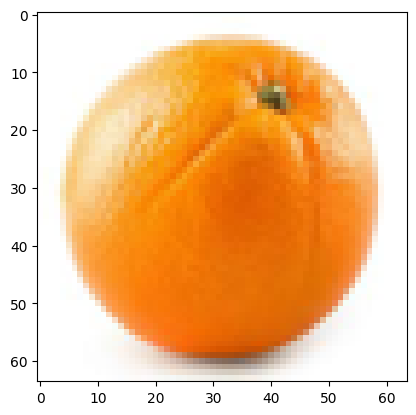

In [46]:
from PIL import Image
img = Image.open('dataset/sample1.jpg')
a = np.asarray(img.resize((64,64)))

plt.imshow(a)
plt.show()

In [47]:
a.shape

(64, 64, 3)

In [66]:
a=a.reshape(1,64,64,3)
a.shape

(1, 64, 64, 3)

In [67]:
model.predict(a)

1/1 [==============================] - 0s 20ms/step


array([[0.]], dtype=float32)

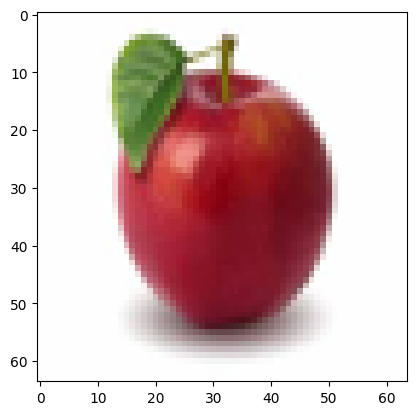

In [53]:
img = Image.open('dataset/sample2.jpg')
a = np.asarray(img.resize((64,64)))

plt.imshow(a)
plt.show()

In [54]:
pred=model.predict(a.reshape(1,64,64,3))
pred

1/1 [==============================] - 0s 20ms/step


array([[0.]], dtype=float32)

Yaha tak

### By using keras

In [56]:
from tensorflow.keras.preprocessing.image import load_img,img_to_array

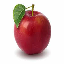

In [61]:
test_img=load_img('dataset/sample2.jpg',target_size=(64,64))
test_img

In [62]:
test_img=img_to_array(test_img)

In [63]:
test_img=np.expand_dims(test_img,axis=0)
test_img.shape

(1, 64, 64, 3)

In [64]:
model.predict(test_img)


1/1 [==============================] - 0s 20ms/step


array([[0.]], dtype=float32)